In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import  rcParams
import statsmodels.api as sm
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
os.chdir(r'/content/drive/My Drive/Time Series Forecasting')
data=pd.read_csv('/content/drive/My Drive/Time Series Forecasting/portland-oregon-average-monthly-.csv')

In [ ]:
data.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   Month                                                                                       115 non-null    object
 1   Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114  115 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [ ]:
data.columns = ["month", "average_monthly_ridership"]
data.head()


,month,average_monthly_ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [ ]:
data.dtypes

month                        object
average_monthly_ridership    object
dtype: object

In [ ]:
data['average_monthly_ridership'].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327', ' n=114'], dtype=object)

In [ ]:
data = data.drop(data.index[data['average_monthly_ridership'] == ' n=114'])

In [ ]:
data['average_monthly_ridership'].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327'], dtype=object)

In [ ]:
data['average_monthly_ridership'] = data['average_monthly_ridership'].astype(np.int32)

In [ ]:
data['month'] = pd.to_datetime(data['month'], format = '%Y-%m')

In [ ]:
data.dtypes

month                        datetime64[ns]
average_monthly_ridership             int32
dtype: object

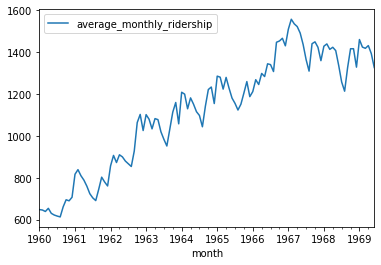

In [ ]:
data.plot.line(x = 'month', y = 'average_monthly_ridership')
plt.show()

In [ ]:
## plotting montyhly variation of dataset
to_plot_monthly_variation=data

In [ ]:
mon=data['month']

In [ ]:
data.head()

,month,average_monthly_ridership
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [ ]:
temp= pd.DatetimeIndex(mon)

In [ ]:
# assign month part of that data to ```month``` variable
month = pd.Series(temp.month)

In [ ]:
# dropping month from to_plot_monthly_variation
to_plot_monthly_variation = to_plot_monthly_variation.drop(['month'], axis = 1)

In [ ]:
# join months so we can get month to average monthly rider mapping
to_plot_monthly_variation = to_plot_monthly_variation.join(month)

In [ ]:
# A quick glance
to_plot_monthly_variation.head()

,average_monthly_ridership,month
0,648,1
1,646,2
2,639,3
3,654,4
4,630,5


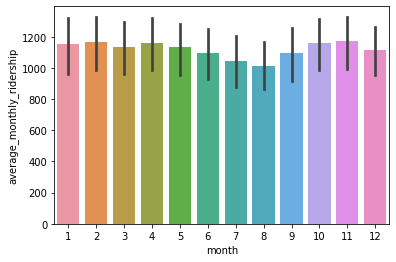

In [ ]:
sns.barplot(x = 'month', y = 'average_monthly_ridership', data = to_plot_monthly_variation)
plt.show()

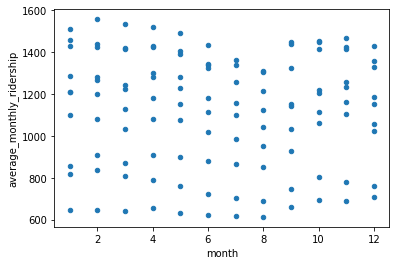

In [ ]:
to_plot_monthly_variation.plot.scatter(x = 'month', y = 'average_monthly_ridership')
plt.show()

In [ ]:
rider = data[['average_monthly_ridership']]

Trend Analysis

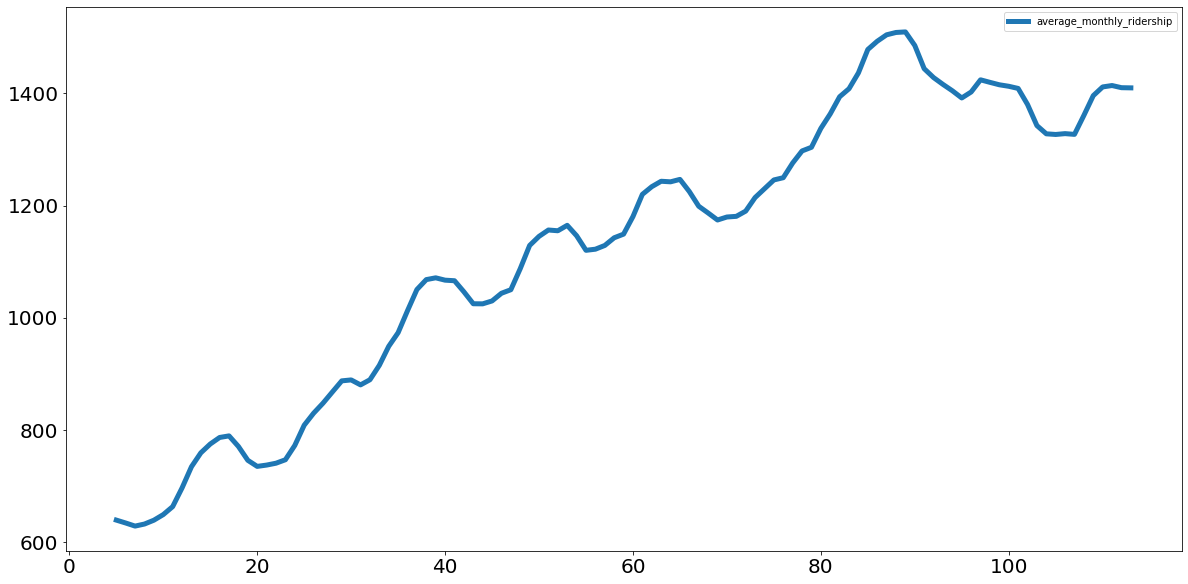

In [ ]:
rider.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

For trend analysis, we use smoothing techniques. In statistics smoothing a data set means to create an approximating function that attempts to capture important patterns in the data, while leaving out noise or other fine-scale structures/rapid phenomena. In smoothing, the data points of a signal are modified so individual points (presumably because of noise) are reduced, and points that are lower than the adjacent points are increased leading to a smoother signal.We implement smoothing by taking moving averages. Exponential moving average is frequently used to compute smoothed function.Here I used the rolling method which is inbuilt in pandas and frequently used for smoothing.

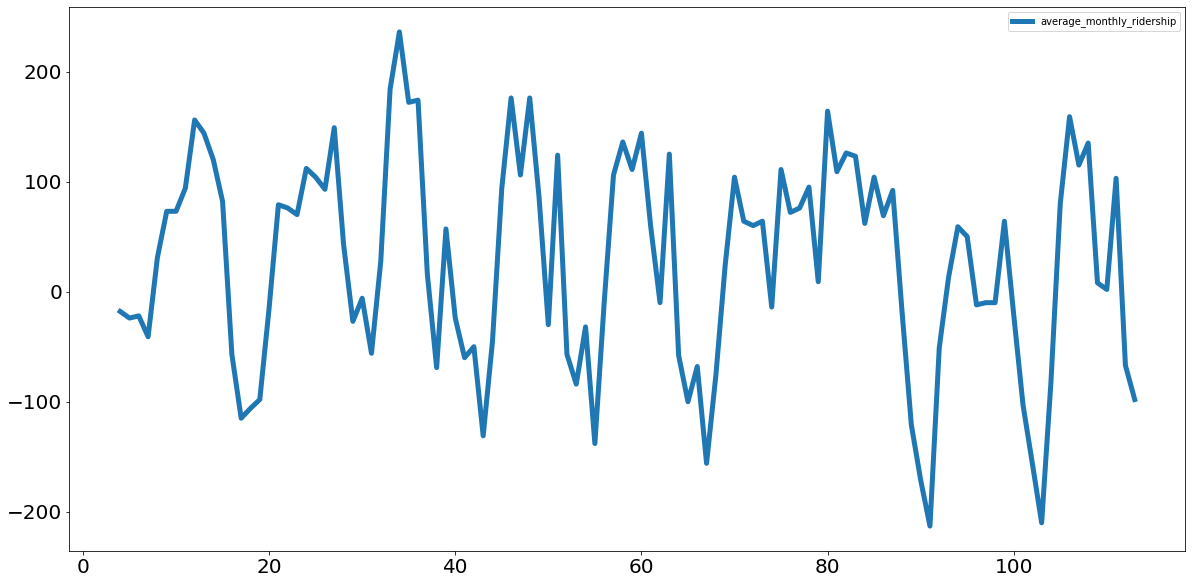

In [ ]:
rider.diff(periods=4).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

Periodicity and Autocorrelation
Auto correlation is the most famous way to understand seasonal variation till now. We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.In this plot vertical axis is represented by the following equations:-

Cn=∑n−ht=1(y(t)−ŷ )(y(t+n)−ŷ )/n 
C0=∑nt=1(y(t)−ŷ )2/n 
Horizontal axis represents time lag(previous time steps) h

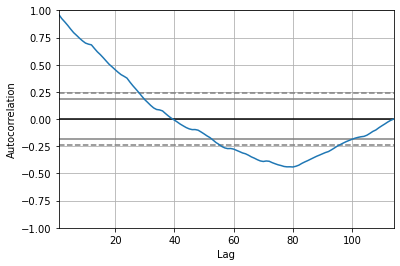

In [ ]:
pd.plotting.autocorrelation_plot(data['average_monthly_ridership'])
plt.show()

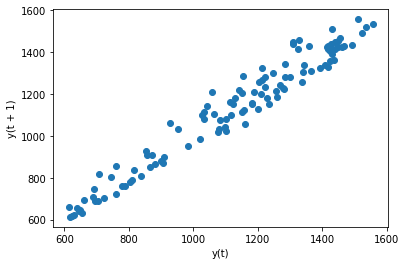

In [ ]:
pd.plotting.lag_plot(data['average_monthly_ridership'])
plt.show()

In [ ]:
data = data.set_index('month')

In [ ]:
# Applying Seasonal ARIMA model to forcast the data 
mod = sm.tsa.SARIMAX(data['average_monthly_ridership'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:          average_monthly_ridership   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -501.340
Date:                            Sat, 17 Oct 2020   AIC                           1008.680
Time:                                    19:43:01   BIC                           1016.526
Sample:                                01-01-1960   HQIC                          1011.856
                                     - 06-01-1969                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3236      0.186      1.739      0.082      -0.041       0.688
ma.S.L12      -0.9990     42.160   

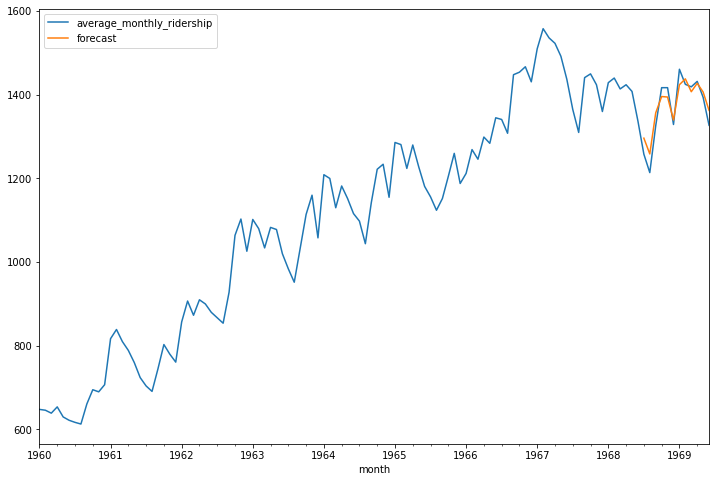

In [ ]:
data['forecast'] = results.predict(start = 102, end= 120, dynamic= True)  
data[['average_monthly_ridership', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [ ]:
def forcasting_future_months(data, no_of_months):
    data_perdict = data.reset_index()
    mon = data_perdict['month']
    mon = mon + pd.DateOffset(months = no_of_months)
    future_dates = mon[-no_of_months -1:]
    data_perdict = data_perdict.set_index('month')
    future = pd.DataFrame(index=future_dates, columns= data_perdict.columns)
    data_perdict = pd.concat([data_perdict, future])
    data_perdict['forecast'] = results.predict(start = 114, end = 125, dynamic= True)  
    data_perdict[['average_monthly_ridership', 'forecast']].iloc[-no_of_months - 12:].plot(figsize=(12, 8))
    plt.show()
    return data_perdict[-no_of_months:]

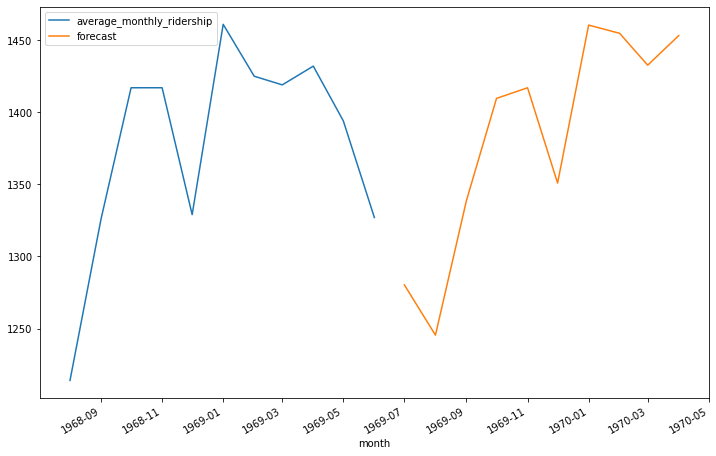

In [ ]:

predicted = forcasting_future_months(data,10)

In [ ]:
data.tail()

,average_monthly_ridership,forecast
month,,
1969-02-01,1425,1438.088735
1969-03-01,1419,1407.274241
1969-04-01,1432,1427.488334
1969-05-01,1394,1406.611336
1969-06-01,1327,1362.727657
